# Homework 4

In [1]:
import os

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Задача №1 - Хвост кита

Не так давно на kaggle было соревнование по классификации горбатых китов по снимках их хвостов. Одним из приемов для улучшения работы нейронной сети было выделение маски хвоста. Затем по этой маске вырезался хвост на исходном изображении, нормировался, отображался на черный фон и подавался нейронной сети на вход. 

Ваша задача - написать программу, которая совершит предобработку картинки, описанную выше. Т.е. найти маску хвоста, по маске вырезать из исходного изображения хвост, нормировать изображение хвоста так, чтобы оно всегда имело один заданный размер и равномерно занимало место, то есть, если хвост был повернут, его нужно выпрямить.

Изображения хвостов находятся в папке whale_tail/images к этому занятию. Разметка картинок (маски хвостов) лежат в папке whale_tail/ground_truth. После выделения хвоста посчитайте IoU для каждой картинки (ипсользуя маски из whale_tail/ground_truth)

<table><tr>
    <td> <img src="img/test_image_01.jpg" alt="Drawing" style="width: 400px;"/> 
    <td> <img src="img/test_image_01.png" alt="Drawing" style="width: 400px;"/> </td>
  
</tr></table>

### IoU 
 Intercetion over union - число от 0 до 1, показывающее, насколько у двух объектов (эталонного (ground true) и текущего) совпадает внутренний “объем”.
 
<table><tr>
    <td> <img src="img/iou.png" alt="Drawing" style="width: 400px;"/> 
  
</tr></table>

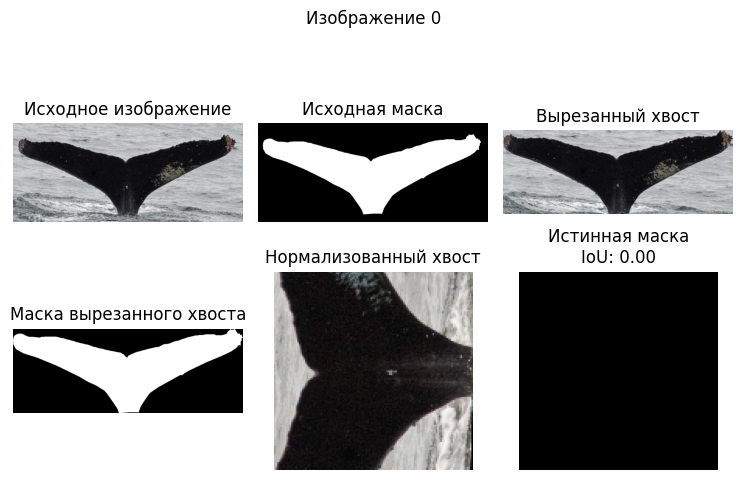

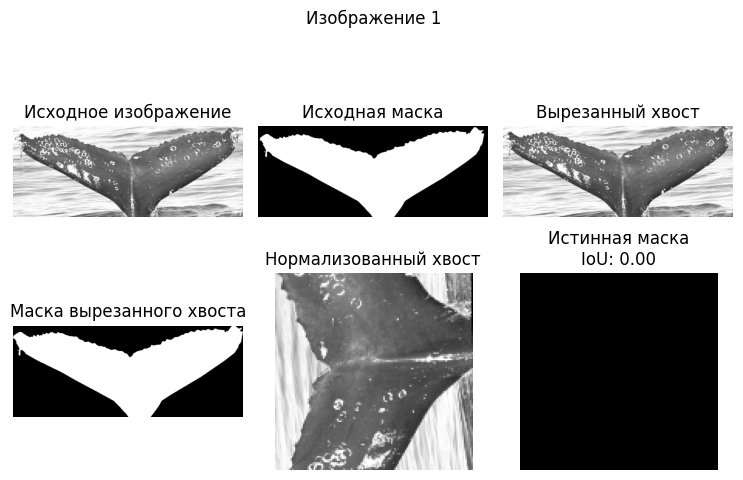

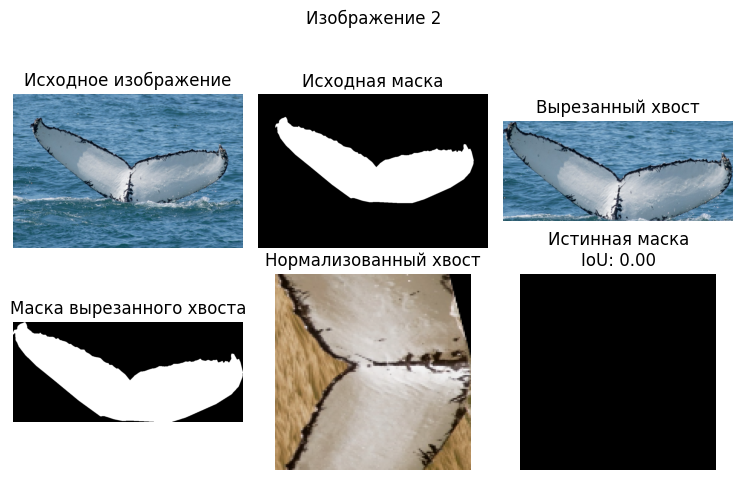

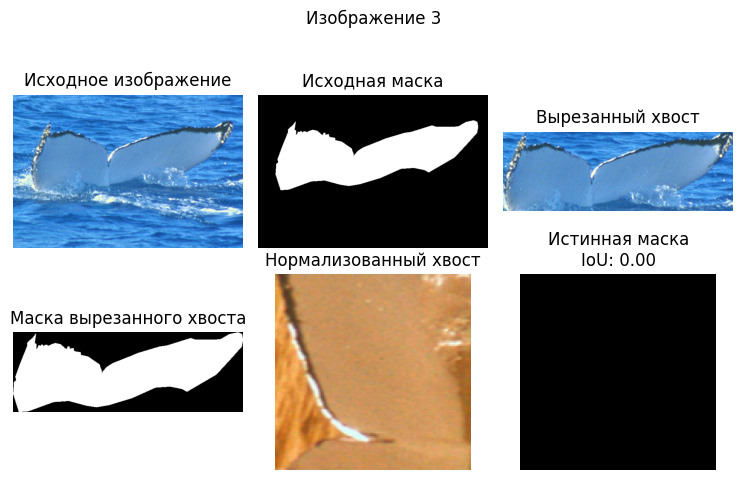

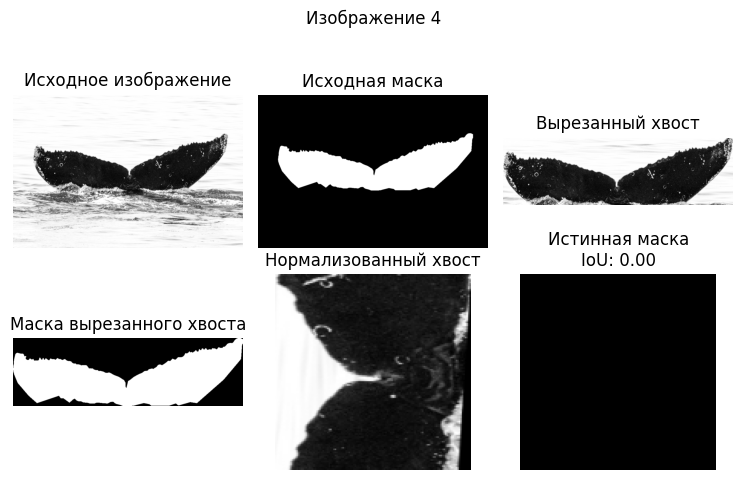

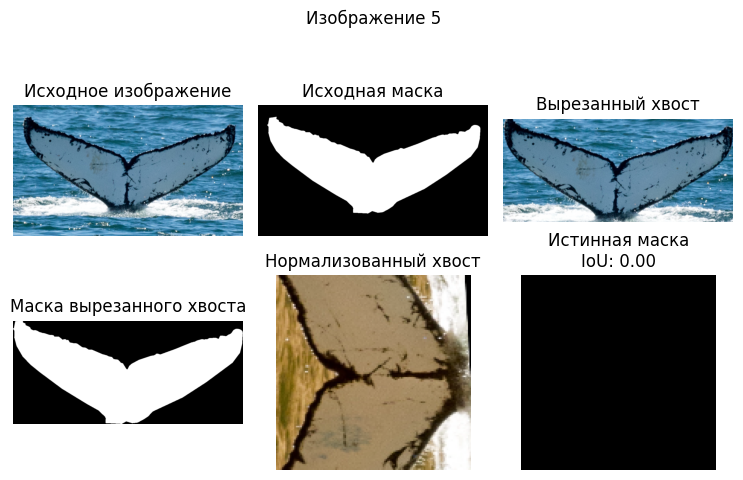

IoU scores: [np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)]
Average IoU: 0.0


In [2]:
from task_1 import load_images_and_masks, extract_tail, normalize_tail, calculate_iou, plot_results

image_dir = 'task_1\\images'
mask_dir = 'task_1\\ground_truth'

images, masks = load_images_and_masks(image_dir, mask_dir)

target_size = (128, 128)
iou_scores = []

if not os.path.exists('task_1\\normalized_tails'):
    os.makedirs('task_1\\normalized_tails')

for i, (image, mask) in enumerate(zip(images, masks)):
    tail, tail_mask = extract_tail(image, mask)
    if tail is None or tail_mask is None:
        iou_scores.append(0)
        continue

    normalized_tail = normalize_tail(tail, tail_mask, target_size)

    gt_mask = cv2.resize(mask, target_size)
    gt_mask = cv2.threshold(gt_mask, 127, 255, cv2.THRESH_BINARY)[1]

    iou_score = calculate_iou(gt_mask, cv2.threshold(normalized_tail[:, :, 0], 127, 255, cv2.THRESH_BINARY)[1])
    iou_scores.append(iou_score)

    cv2.imwrite(f'task_1/normalized_tails/tail_{i}.png', normalized_tail)

    plot_results(image, mask, tail, tail_mask, normalized_tail, gt_mask, iou_score, i)

print(f'IoU scores: {iou_scores}')
print(f'Average IoU: {np.mean(iou_scores)}')

# Задача №2 - Найти шаблон на изображении с помощью HOG и кросс-корреляции

Ваша задача - написать программу, которая сможет найти шаблон одного глаза на нескольких изображениях, в том числе затемненных. Использовать нужно HOG представление изображений, поиск шаблона сделать с помощью кросс-корреляции 

Изображение глаз человека и шаблон, который нужно на нем найти, находятся в папке hog

<table><tr>
    <td> <img src="img/eye.png" alt="Drawing" style="width: 400px;"/> 
</tr></table>     

<table><tr>
    <td> <img src="img/eyes.jpg" alt="Drawing" style="width: 400px;"/> </td>
      <td> <img src="img/eyes_dark.jpg" alt="Drawing" style="width: 400px;"/> </td>
      <td> <img src="img/woman.jpg" alt="Drawing" style="width: 200px;"/> </td>

</tr></table>

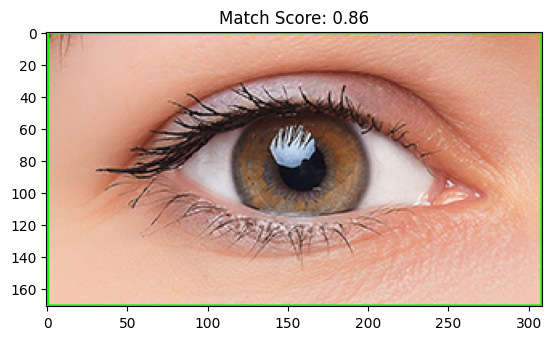

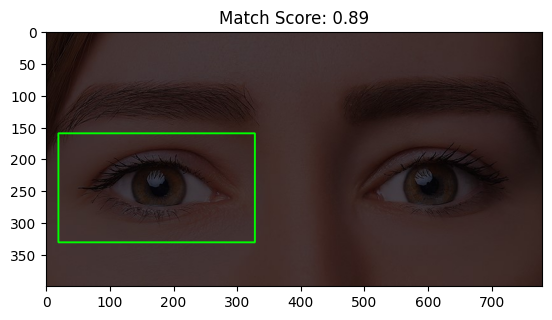

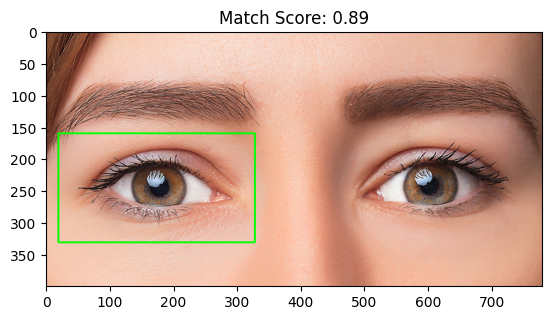

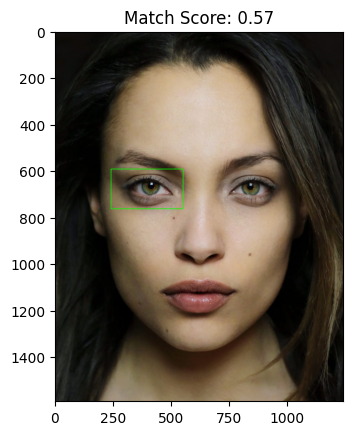

In [3]:
from task_2 import preprocess_image, compute_hog, cross_correlation

images = ["task_2\\eye.png", "task_2\\eyes_dark.jpg", "task_2\\eyes.jpg", "task_2\\woman.jpg"]

template_path = "task_2\\eye.png"
template = cv2.imread(template_path, cv2.IMREAD_GRAYSCALE)

template_shape = template.shape

for image_path in images:
    image = cv2.imread(image_path)

    template_hog, _ = compute_hog(template)
    position, score, template_score = cross_correlation(image, template, template_hog, template_shape)

    if position:
        x, y = position
        h, w = template_shape
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f"Match Score: {score:.2f}")
    plt.show()